In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mesa_reader as mr
from scipy.optimize import curve_fit
rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs
G = 6.67259e-8 #grav constant CGS
z  = 0.014 #solar metalicity

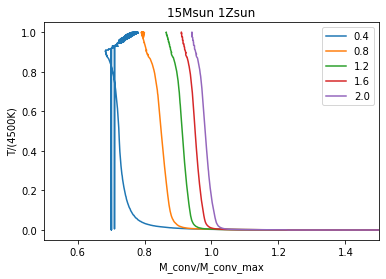

In [10]:
ml_dir = ['04/','08/','12/','16/','20/']
mix = ['0.4','0.8','1.2','1.6','2.0' ]


for i,ml in enumerate(ml_dir):
    data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Mixing_length/' + ml + 'history.data') # load data
    log_Lnuc = np.array(data.log_Lnuc)
    M_conv_env = np.array(data.M_conv_env)
    T_eff = np.array(data.effective_T)
    
    M_conv_env = M_conv_env[log_Lnuc > 0]
    T_eff = T_eff[log_Lnuc > 0]
    M_conv_max = max(M_conv_env)
    plt.plot(T_eff/4500, M_conv_env/M_conv_max, label = mix[i])
plt.legend()
plt.title('15Msun 1Zsun')
plt.ylabel('T/(4500K)')
plt.xlabel('M_conv/M_conv_max')
plt.xlim(0.5,1.5)    
plt.show()

This is to test the effects of overshoot on the shape of the norm curves 

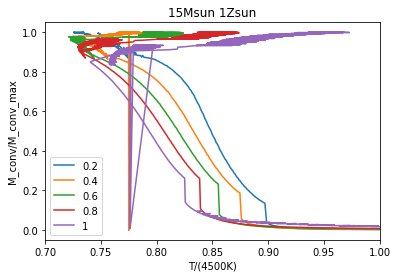

In [22]:
overshoot_dir = ['02/','04/','06/','08/','1/']
overshoot = ['0.2','0.4','0.6','0.8','1' ]

for i,o in enumerate(overshoot_dir):
    data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/overshoot/' + o +'history.data')
    log_Lnuc = np.array(data.log_Lnuc)
    M_conv_env = np.array(data.M_conv_env)
    T_eff = np.array(data.effective_T)
    
    M_conv_env = M_conv_env[log_Lnuc > 0]
    T_eff = T_eff[log_Lnuc > 0]
    M_conv_max = max(M_conv_env)
    plt.plot(T_eff/4500, M_conv_env/M_conv_max, label = overshoot[i])
plt.legend()
plt.title('15Msun 1Zsun')
plt.xlabel('T/(4500K)')
plt.ylabel('M_conv/M_conv_max')
plt.xlim(0.7,1.0)    
plt.show()

This is for the effects of mass loss with star. We need to check the m_inter/m_core value 

1Z/
10
15
20
25
001Z/
10
15
20
25


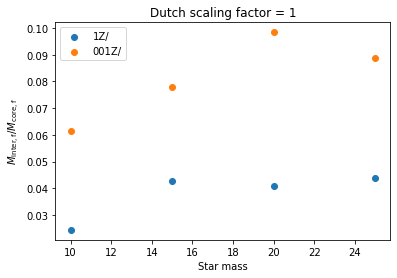

In [18]:
star_mass = [10,15,20,25]
z_dir = ['1Z/', '001Z/']
wind_dir = ['1/','03/']

for i,z in enumerate(z_dir):
    print(z)
    gamma = []
    for j,m in enumerate(star_mass):
        print(m)
        data = data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Wind/1/' + z + str(m) + 'M/history.data')
        gamma.append((data.M_inter[-1]/msol)/data.he_core_mass[-1])
        
    plt.scatter(star_mass,gamma, label = z)
plt.title('Dutch scaling factor = 1')
plt.legend()
plt.xlabel('Star mass')
plt.ylabel('$M_\mathrm{inter,f}/M_\mathrm{core,f}$')
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/RYO/Wind/1.pdf')
plt.show()

1Z/
10
15
20
25
001Z/
10
15
20
25


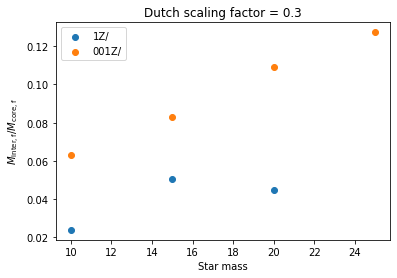

In [20]:
star_mass = [10,15,20,25]
z_dir = ['1Z/', '001Z/']
wind_dir = ['1/','03/']

for i,z in enumerate(z_dir):
    print(z)
    gamma = []
    for j,m in enumerate(star_mass):
        print(m)
        data = data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Wind/03/' + z + str(m) + 'M/history.data')
        gamma.append((data.M_inter[-1]/msol)/data.he_core_mass[-1])
    if i == 0:    
        plt.scatter(star_mass[0:3],gamma[0:3], label = z)
    else:
        plt.scatter(star_mass,gamma, label = z)
plt.title('Dutch scaling factor = 0.3')
plt.legend()
plt.xlabel('Star mass')
plt.ylabel('$M_\mathrm{inter,f}/M_\mathrm{core,f}$')
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/RYO/Wind/03.pdf')
plt.show()